In [92]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

filename = 'Data_CASAB.csv'

In [93]:
import io
import sys

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
# text API's
import re
import spacy
import unicodedata
from nltk import TweetTokenizer
from spacy.lang.es import Spanish
from spacy.lang.en import English
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [94]:
start = time.time()
data_raw= pd.read_csv(filename, sep=',', chunksize=6400000)
end = time.time()
print("Read csv with chunks: ",(end-start),"sec")

Read csv with chunks:  0.005005598068237305 sec


In [95]:
data = pd.concat(data_raw)
data.head() 

,Unnamed: 0,Unnamed: 0.1,client,country,timestamp,method,request,status,user_agent
0,0,0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,1,1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
2,2,2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
3,3,3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,4,4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,POST,https://casab-nodejs.herokuapp.com/api/user/login,200,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1275 non-null   int64 
 1   Unnamed: 0.1  1275 non-null   int64 
 2   client        1275 non-null   object
 3   country       1275 non-null   object
 4   timestamp     1275 non-null   object
 5   method        1275 non-null   object
 6   request       1275 non-null   object
 7   status        1275 non-null   int64 
 8   user_agent    1275 non-null   object
dtypes: int64(3), object(6)
memory usage: 89.8+ KB


In [97]:
data.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
client          0
country         0
timestamp       0
method          0
request         0
status          0
user_agent      0
dtype: int64

In [98]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,status
count,1275.000000,1275.000000,1275.000000
mean,205.431373,205.431373,248.627451
std,187.031807,187.031807,85.829127
min,0.000000,0.000000,200.000000
25%,63.000000,63.000000,200.000000
50%,127.000000,127.000000,200.000000
75%,335.500000,335.500000,200.000000
max,654.000000,654.000000,400.000000


In [99]:
data['Unnamed: 0.1'].value_counts().to_frame()

,Unnamed: 0.1
0,5
107,5
100,5
101,5
102,5
...,...
315,1
314,1
313,1
312,1


In [100]:
data['Unnamed: 0'].value_counts().to_frame()

,Unnamed: 0
0,5
107,5
100,5
101,5
102,5
...,...
315,1
314,1
313,1
312,1


In [101]:
data['client'].value_counts().to_frame()

,client
161.10.61.118,255
186.82.85.225,255
186.116.84.160,255
161.10.56.234,255
179.14.33.112,255


In [102]:
data['country'].value_counts().to_frame()

,country
Colombia,1275


In [103]:
data['timestamp'].value_counts().to_frame()

,timestamp
2022-02-22T19:49:07.666808000,10
2022-03-10T19:49:07.666808000,10
2022-02-23T19:49:07.666808000,10
2022-03-24T19:49:07.666808000,10
2022-03-23T19:49:07.666808000,10
...,...
2022-05-29T19:49:07.666808000,5
2022-05-30T19:49:07.666808000,5
2022-05-31T19:49:07.666808000,5
2022-06-01T19:49:07.666808000,5


In [104]:
data['method'].value_counts().to_frame()

,method
POST,1275


In [105]:
 data['request'].value_counts().to_frame()

,request
https://casab-nodejs.herokuapp.com/api/user/login,1275


In [106]:
 data['status'].value_counts().to_frame()

,status
200,965
400,310


In [107]:
  data['user_agent'].value_counts().to_frame()

,user_agent
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36",765
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.53",255
"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 OPR/86.0.4363.70",255


In [108]:
data.drop(["Unnamed: 0.1", "Unnamed: 0", "request", "method", "user_agent"],axis=1, inplace=True)
data

,client,country,timestamp,status
0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,200
1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,200
2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,200
3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,200
4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,200
...,...,...,...,...
1270,161.10.61.118,Colombia,2022-03-25T00:05:36.542950000,200
1271,186.82.85.225,Colombia,2022-03-25T00:05:36.542950000,200
1272,186.116.84.160,Colombia,2022-03-25T00:05:36.542950000,200
1273,161.10.56.234,Colombia,2022-03-25T00:05:36.542950000,400


In [109]:
time = data["timestamp"]
time

0       2022-02-22T19:49:07.666808000
1       2022-02-22T19:49:07.666808000
2       2022-02-22T19:49:07.666808000
3       2022-02-22T19:49:07.666808000
4       2022-02-22T19:49:07.666808000
                    ...              
1270    2022-03-25T00:05:36.542950000
1271    2022-03-25T00:05:36.542950000
1272    2022-03-25T00:05:36.542950000
1273    2022-03-25T00:05:36.542950000
1274    2022-03-25T00:05:36.542950000
Name: timestamp, Length: 1275, dtype: object

In [110]:
 time = data['timestamp'].str.split('T', expand=True)
time[1]

0       19:49:07.666808000
1       19:49:07.666808000
2       19:49:07.666808000
3       19:49:07.666808000
4       19:49:07.666808000
               ...        
1270    00:05:36.542950000
1271    00:05:36.542950000
1272    00:05:36.542950000
1273    00:05:36.542950000
1274    00:05:36.542950000
Name: 1, Length: 1275, dtype: object

In [111]:
data.insert(4, "Time" , time[1])

In [112]:
data.insert(4, "Date" , time[0])

In [113]:
data

,client,country,timestamp,status,Date,Time
0,161.10.61.118,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,2022-02-22T19:49:07.666808000,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...,...
1270,161.10.61.118,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,2022-03-25T00:05:36.542950000,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,2022-03-25T00:05:36.542950000,400,2022-03-25,00:05:36.542950000


In [114]:
data.drop(columns =["timestamp"], inplace = True)
data

,client,country,status,Date,Time
0,161.10.61.118,Colombia,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,200,2022-02-22,19:49:07.666808000
...,...,...,...,...,...
1270,161.10.61.118,Colombia,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,400,2022-03-25,00:05:36.542950000


# Analisis Descriptivo

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   client   1275 non-null   object
 1   country  1275 non-null   object
 2   status   1275 non-null   int64 
 3   Date     1275 non-null   object
 4   Time     1275 non-null   object
dtypes: int64(1), object(4)
memory usage: 49.9+ KB


In [116]:
data.head()

,client,country,status,Date,Time
0,161.10.61.118,Colombia,200,2022-02-22,19:49:07.666808000
1,186.82.85.225,Colombia,200,2022-02-22,19:49:07.666808000
2,186.116.84.160,Colombia,200,2022-02-22,19:49:07.666808000
3,161.10.56.234,Colombia,200,2022-02-22,19:49:07.666808000
4,179.14.33.112,Colombia,200,2022-02-22,19:49:07.666808000


In [117]:
data.tail()

,client,country,status,Date,Time
1270,161.10.61.118,Colombia,200,2022-03-25,00:05:36.542950000
1271,186.82.85.225,Colombia,200,2022-03-25,00:05:36.542950000
1272,186.116.84.160,Colombia,200,2022-03-25,00:05:36.542950000
1273,161.10.56.234,Colombia,400,2022-03-25,00:05:36.542950000
1274,179.14.33.112,Colombia,400,2022-03-25,00:05:36.542950000


In [118]:
data.sample(5)

,client,country,status,Date,Time
120,161.10.61.118,Colombia,200,2022-03-18,19:49:07.666808000
1121,186.82.85.225,Colombia,200,2022-02-23,00:05:36.542950000
775,161.10.61.118,Colombia,200,2022-03-18,15:11:33.172457000
1210,161.10.61.118,Colombia,200,2022-03-13,00:05:36.542950000
323,161.10.56.234,Colombia,200,2022-04-27,19:49:07.666808000


In [119]:
data.describe()

,status
count,1275.000000
mean,248.627451
std,85.829127
min,200.000000
25%,200.000000
50%,200.000000
75%,200.000000
max,400.000000


In [120]:
print(data['status'].value_counts())

200    965
400    310
Name: status, dtype: int64


In [121]:
print(data['client'].value_counts())

161.10.61.118     255
186.82.85.225     255
186.116.84.160    255
161.10.56.234     255
179.14.33.112     255
Name: client, dtype: int64


In [122]:
print(data['country'].value_counts())

Colombia    1275
Name: country, dtype: int64


C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


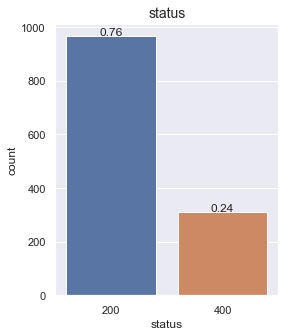

In [123]:
# The plot show the amount o employees that stayed and left the company.
plt.figure(figsize=(4,5))
ax = sns.countplot(data.status)
total = float(len(data))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title('status', fontsize=14);

C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Graph')

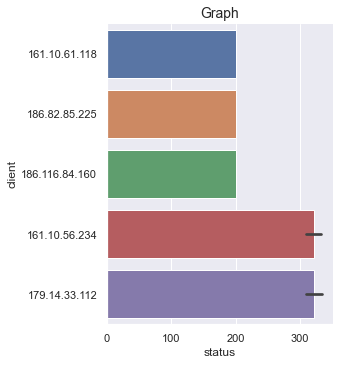

In [124]:
j = sns.factorplot(x='status', y='client', kind='bar', data=data)
plt.title('Graph', fontsize=14)

C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Graph 2')

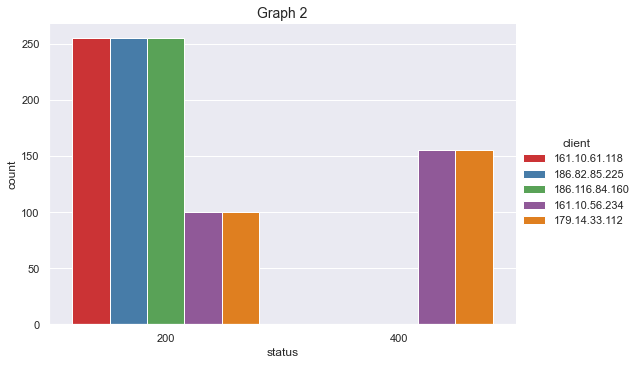

In [125]:
h = sns.factorplot(x = 'status', hue='client', kind ='count', size = 5,aspect=1.5, data=data, palette='Set1' )
plt.title("Graph 2", fontsize=14)


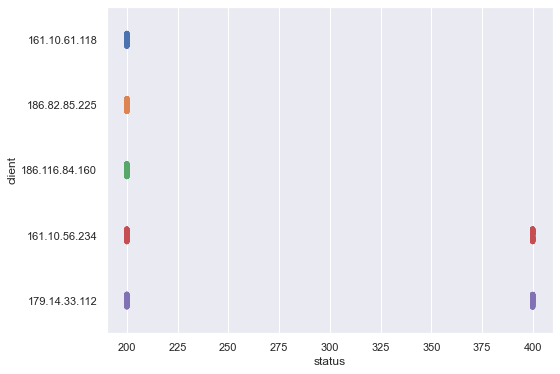

In [126]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="status", y="client", data=data)
plt.show()

C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CARLOS\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


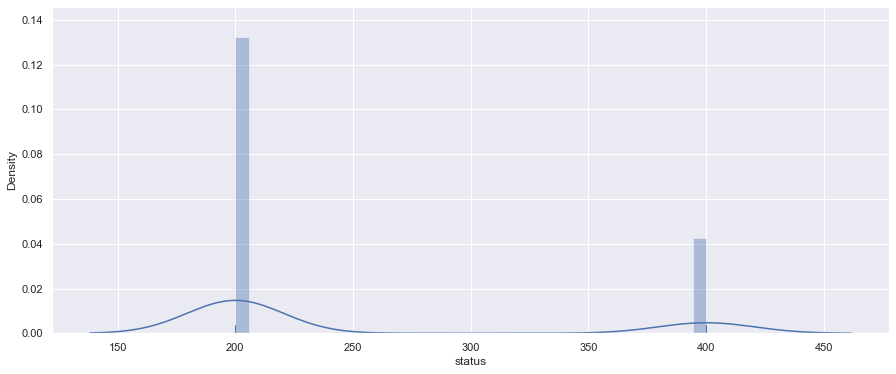

In [127]:
f,ax = plt.subplots(figsize=(15,6)) 
ax = sns.distplot(data['status'],rug=True)
plt.show()

In [128]:
data['client'] = data['client'].astype('string')

In [129]:
labels = np.array(data['client'])
y = []
for i in labels:
    if i == "161.10.61.118":
        y.append(0)
    if i == "186.82.85.225":
        y.append(1)
    if i == "186.116.84.160":
        y.append(2)
    if i == "161.10.56.234":
        y.append(3)
    if i == "179.14.33.112":
        y.append(4)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 7,dtype="float32")
del y

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   client   1275 non-null   string
 1   country  1275 non-null   object
 2   status   1275 non-null   int64 
 3   Date     1275 non-null   object
 4   Time     1275 non-null   object
dtypes: int64(1), object(3), string(1)
memory usage: 49.9+ KB


In [131]:
len(labels)

1275

In [132]:
x= data['status']
x

0       200
1       200
2       200
3       200
4       200
       ... 
1270    200
1271    200
1272    200
1273    400
1274    400
Name: status, Length: 1275, dtype: int64

In [133]:
len(x)

1275

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x,labels, test_size=0.25,random_state=42)
print (len(X_train),len(X_test),len(y_train),len(y_test))

956 319 956 319


In [135]:
import io
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
# text API's
import re
import spacy
import unicodedata
from nltk import TweetTokenizer
from spacy.lang.es import Spanish
from spacy.lang.en import English
import nltk
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional



In [136]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [137]:
model2 = Sequential()
model2.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[-1],1), activation='tanh'))
model2.add(Dropout(0.2))
model2.add(GRU(units=150, return_sequences=True, input_shape=(X_train.shape[-1],1), activation='tanh'))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[-1],1), activation='tanh'))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[-1],1), activation='tanh'))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, return_sequences=True,  input_shape=(X_train.shape[-1],1),activation='tanh'))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, input_shape=(X_train.shape[-1],1), activation='tanh'))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

In [138]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_17 (GRU)                (None, 956, 150)          68850     
                                                                 
 dropout_17 (Dropout)        (None, 956, 150)          0         
                                                                 
 gru_18 (GRU)                (None, 956, 150)          135900    
                                                                 
 dropout_18 (Dropout)        (None, 956, 150)          0         
                                                                 
 gru_19 (GRU)                (None, 956, 50)           30300     
                                                                 
 dropout_19 (Dropout)        (None, 956, 50)           0         
                                                                 
 gru_20 (GRU)                (None, 956, 50)          

In [139]:
model2.compile(optimizer='SGD',loss='mean_squared_error', metrics=['accuracy'])

In [140]:
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=80,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1311 - accuracy: 0.8571WARNING:tensorflow:Model was constructed with shape (None, 956, 1) for input KerasTensor(type_spec=TensorSpec(shape=(None, 956, 1), dtype=tf.float32, name='gru_17_input'), name='gru_17_input', description="created by layer 'gru_17_input'"), but it was called on an input with incompatible shape (None, 1, 1).

Epoch 1: val_accuracy improved from -inf to 0.85714, saving model to best_model1.hdf5
30/30 [==============================] - 8s 54ms/step - loss: 0.1307 - accuracy: 0.8571 - val_loss: 0.1245 - val_accuracy: 0.8571
Epoch 2/80
30/30 [==============================] - ETA: 0s - loss: 0.1235 - accuracy: 0.8571
Epoch 2: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 7ms/step - loss: 0.1235 - accuracy: 0.8571 - val_loss: 0.1227 - val_accuracy: 0.8571
Epoch 3/80
20/30 [===================>..........] - ETA: 0s - loss: 0.1227 - accuracy: 0.8571
Epoch 3: val_

Epoch 27/80
29/30 [============================>.] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 27: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 7ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 28/80
22/30 [=====================>........] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 28: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 7ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 29/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 29: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 7ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 30/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 30: val_accuracy did not improve from 0.85714
30/30 [==================

Epoch 57/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 57: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 8ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 58/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 58: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 9ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 59/80
28/30 [===========================>..] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 59: val_accuracy did not improve from 0.85714
30/30 [==============================] - 0s 8ms/step - loss: 0.1226 - accuracy: 0.8571 - val_loss: 0.1224 - val_accuracy: 0.8571
Epoch 60/80
26/30 [=========================>....] - ETA: 0s - loss: 0.1226 - accuracy: 0.8571
Epoch 60: val_accuracy did not improve from 0.85714
30/30 [==================

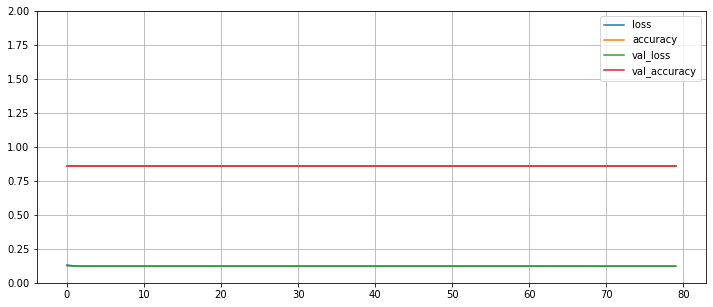

In [49]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()